## Breast cancer detection using SVM

### Libraries needed

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

### load the data and scale the features

In [7]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Create and Evaluate the Model

In [8]:
# Create the SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    svm_model, X_scaled, y,
    cv=cv,
    scoring='accuracy'
)

# Print results
print("Cross-validation scores:", scores)
print(f"Mean CV score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Cross-validation scores: [0.97368421 0.98245614 0.97368421 0.99122807 0.97345133]
Mean CV score: 0.979 (+/- 0.014)


### Compare c values ad plot CVA vs C

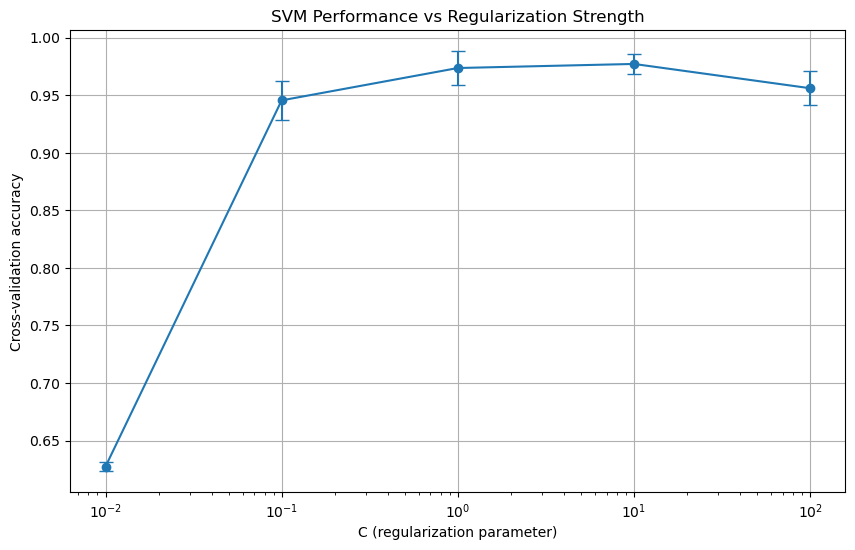

In [11]:
# Compare different C values using cross-validation
def compare_c_values():
    C_values = [0.01, 0.1, 1, 10, 100]
    mean_scores = []
    std_scores = []
    
    for C in C_values:
        model = SVC(kernel='rbf', C=C, random_state=42)
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
        mean_scores.append(scores.mean())
        std_scores.append(scores.std())
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.errorbar(C_values, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
    plt.xscale('log')
    plt.xlabel('C (regularization parameter)')
    plt.ylabel('Cross-validation accuracy')
    plt.title('SVM Performance vs Regularization Strength')
    plt.grid(True)
    plt.show()

compare_c_values()